### Codio Activity 22.3: Basic Weight Update

**Expected Time = 60 minutes**

**Total Points = 60**

This activity focuses on updating the weights to improve the performance of the network.  To demonstrate this update process, we implement a basic loss function and its derivative to update randomly initialized weights.  You begin with a very basic dataset meant to replicate the logic gate problems surrounding the early ANN models.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#set up our data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [23]:
#subset no and yes
nos = X[y == 0]
yesses = X[y == 1]

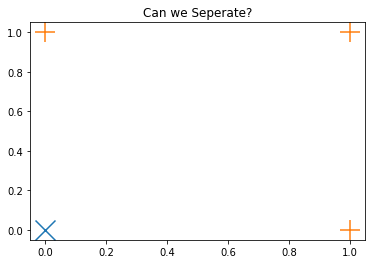

In [24]:
#plot our examples
plt.scatter(nos[:, 0], nos[:, 1], marker = 'x', s = 400)
plt.scatter(yesses[:, 0], yesses[:, 1], marker = '+', s = 400)
plt.title("Can we Seperate?");

[Back to top](#-Index)

### Problem 1

#### Preparing the Data

**10 Points**

To prepare the data for modeling, you will need to add a bias term.  In this example, you are to prepend a column of -1's to the array `X` and save the new array as `Xt` below.

In [25]:
### GRADED
ones = ''
Xt = ''
    
### BEGIN SOLUTION
b = np.ones((X.shape[0], 1)) * -1
Xt = np.concatenate((b, X), axis = 1)
### END SOLUTION

### ANSWER CHECK
print(Xt)

[[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [-1.  1.  1.]]


In [26]:
### BEGIN HIDDEN TESTS
b_ = np.ones((X.shape[0], 1)) * -1
Xt_ = np.concatenate((b_, X), axis = 1)
#
#
#
np.testing.assert_array_equal(Xt, Xt_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Initializing the weights

**10 Points**

Below, an array of weights is given for both the bias term and the two features.  Use this weight array `w` to apply these weights to the input and bias.  Assign this product to `weighted_sum` below.

In [27]:
#weight array
w = np.array([-0.05, -0.02, 0.02])

In [28]:
### GRADED
weighted_sum = ''
    
### BEGIN SOLUTION
weighted_sum = Xt@w
### END SOLUTION

### ANSWER CHECK
print(weighted_sum)

[0.05 0.07 0.03 0.05]


In [29]:
### BEGIN HIDDEN TESTS
b_ = np.ones((X.shape[0], 1)) * -1
Xt_ = np.concatenate((b_, X), axis = 1)
weighted_sum_ = Xt_@w
#
#
#
np.testing.assert_array_equal(weighted_sum, weighted_sum_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Activation Function

**10 Points**

Now, use the basic threshold activation function to output 1 if the input is greater than 0, otherwise label it 0.  Assign the values as `predictions` below.  Apply this threshold function to the weighted sum.  What is the accuracy of the classifier after 1 epoch?  

In [30]:
### GRADED
predictions = ''
    
### BEGIN SOLUTION
predictions = np.where(weighted_sum > 0, 1, 0)
### END SOLUTION

### ANSWER CHECK
print(predictions)

[1 1 1 1]


In [31]:
### BEGIN HIDDEN TESTS
b_ = np.ones((X.shape[0], 1)) * -1
Xt_ = np.concatenate((b_, X), axis = 1)
weighted_sum_ = Xt_@w
predictions_ = np.where(weighted_sum_ > 0, 1, 0)
#
#
#
np.testing.assert_array_equal(predictions, predictions_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Weight Update

**10 Points**

Next, you want to update the initial weights using the following rule for gradient descent with learning rate $\alpha$:

$$w_{i + 1} = w_{i} + \alpha(y - \hat{y})x$$

Use this rule to update the initial weights with $\alpha = 0.1$ and assign to `w2` below.

In [32]:
### GRADED
w2 = ''
    
### BEGIN SOLUTION
w2 = w + 0.1*(y - predictions)@Xt
### END SOLUTION

### ANSWER CHECK
print(w2)

[ 0.05 -0.02  0.02]


In [33]:
### BEGIN HIDDEN TESTS
b_ = np.ones((X.shape[0], 1)) * -1
Xt_ = np.concatenate((b_, X), axis = 1)
weighted_sum_ = Xt_@w
predictions_ = np.where(weighted_sum_ > 0, 1, 0)
w2_ = w + 0.1*(y - predictions_)@Xt_
#
#
#
np.testing.assert_array_equal(w2, w2_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 5

#### Putting it together

**10 Points**

Now, consider building a model by performing 10 iterations of the weight updates.  What is the accuracy?  Assign this to `ans5` below.

In [14]:
### GRADED
w = np.array([-0.05, -0.02, 0.02])
for i in range(10):
    #perform our estimation
    predictions = ''
    ##print(predictions)
    #weight update
    w = ''
ans5 = ''   
    
### BEGIN SOLUTION
w = np.array([-0.05, -0.02, 0.02])
for i in range(10):
    #perform our estimation
    predictions = np.where(Xt@w > 0, 1, 0)
    #print(preds)
    #weight update
    w = w + 0.1*(y - predictions)@Xt
ans5 = sum(predictions == y)/len(y)
### END SOLUTION

### ANSWER CHECK
print(ans5)
print(w)
print(predictions)

1.0
[0.05 0.18 0.22]
[0 1 1 1]


In [15]:
### BEGIN HIDDEN TESTS
w_ = np.array([-0.05, -0.02, 0.02])
for i in range(10):
    #perform our estimation
    predictions_ = np.where(Xt_@w_ > 0, 1, 0)
    #print(preds)
    #weight update
    w_ = w_ + 0.1*(y - predictions_)@Xt_
ans5_ = sum(predictions_ == y)/len(y)
#
#
#
np.testing.assert_array_equal(w, w_)
assert ans5 == ans5_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 6

#### A Larger Example

**10 Points**

Below, a second example is constructed using a synthetic dataset.  Your goal is to use the algorithm for updating the weights.  Determie the accuracy and assign as `ans6` below.

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X, y = make_blobs(centers = 2, center_box=(-3, 3), random_state = 22)

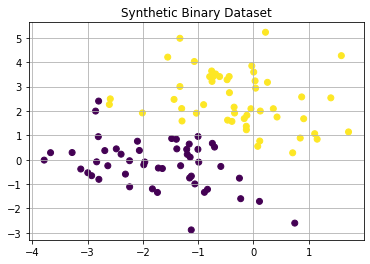

In [18]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.grid()
plt.title('Synthetic Binary Dataset');

In [19]:
### GRADED
X2 = ''
w = np.array([0, 0, 0])
for i in range(100):
    #perform our estimation
    predictions = ''
    ##print(predictions)
    #weight update
    w = ''
ans6 = ''   
    
### BEGIN SOLUTION
w = np.array([0, 0, 0])
biases = np.ones((X.shape[0], 1))
X2 = np.concatenate((biases, X), axis = 1)
for i in range(100):
    #perform our estimation
    predictions = np.where(X2@w > 0, 1, 0)
    #print(preds)
    #weight update
    w = w + 0.1*(y - predictions)@X2
ans6 = sum(predictions == y)/len(y)
### END SOLUTION

### ANSWER CHECK
print(w)
print(ans6)

[-1.4         7.85617133  9.69891443]
1.0


In [20]:
### BEGIN HIDDEN TESTS
w_ = np.array([0, 0, 0])
biases_ = np.ones((X.shape[0], 1))
X2_ = np.concatenate((biases_, X), axis = 1)
for i in range(100):
    #perform our estimation
    predictions_ = np.where(X2_@w_ > 0, 1, 0)
    #print(preds)
    #weight update
    w_ = w_ + 0.1*(y - predictions_)@X2_
ans6_ = sum(predictions_ == y)/len(y)
#
#
#
np.testing.assert_array_equal(w, w_)
assert ans6 == ans6_
### END HIDDEN TESTS